<a href="https://colab.research.google.com/github/deeponcology/PyTorchMedicalAI/blob/master/shlomo_dl_0003_pytorch_ffn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning in Medical AI 2018/2019 using PyTorch & Google Collab.


<table align="left"><td>
<a target="_blank" href="https://colab.research.google.com/drive/1JEIeD_445sFvcjSrITB5Z_oW8VHRS_kA">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>  
</td><td>
<a target="_blank" href="https://github.com/deeponcology/PyTorchMedicalAI/blob/master/shlomo_dl_0001_cuda_collab_pytorch.ipynb"><img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a></td></table>

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/tumor_visdom.jpg" align="center" width=30%>

### Author: 
***Shlomo Kashani***, Head of AI at www.DeepOncology.AI, shlomo@deeponcology.ai 

<img src="https://github.com/deeponcology/PyTorchMedicalAI/raw/master/assets/line-up-small.png" align="center" width=30%>


### Synopsys:
This is the hands-on deep learning tutorial series for the 2018/2019 Medical AI course. The series will guide you through the most basic building blocks such as installing CUDA to training advanced CNN's such as SeNet. 

### DataSets:
We foster the use of Medical Data Sets (https://grand-challenge.org/All_Challenges/) and predominantly those available (but not only) via Kaggle.

### About PyTorch:

PyTorch is an open source library for numerical computation using  computation graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. 


Similar to python programming, we can add and execute a node to the computation graph immediately. This property makes it easy to debug the code and inspect the values in the network.



# Collab notebook: 0003 PyTorch MNIST FFN

This Jupyter notebook explains various approaches for implementing neural networks that recognize digits on MNIST dataset.


# Install PyTorch

In [0]:
import sys
sys.version

%reset -f
import os
os.environ['PATH'] += ':/usr/local/cuda/bin'
import sys
sys.version

# !pip3 install torch==0.4
# !pip3 install torchvision

!pip3 install 'torch==0.4.0'
!pip3 install 'torchvision==0.2.1'
!pip3 install --no-cache-dir -I 'pillow==5.1.0'

# Restart Kernel
# This workaround is needed to properly upgrade PIL on Google Colab.
import os
os._exit(0)

    100% |████████████████████████████████| 484.0MB 35kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b242000 @  0x7f39c522c2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 2.0MB 11.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 60.8MB/s 


In [0]:
!pip3 install torchvision

# Import PyTorch

In [0]:
import sys
print('__Python VERSION:', sys.version)
print('__pyTorch VERSION:', torch.__version__)
print('__CUDA VERSION')
from subprocess import call
# call(["nvcc", "--version"]) does not work
! nvcc --version
print('__CUDNN VERSION:', torch.backends.cudnn.version())
print('__Number CUDA Devices:', torch.cuda.device_count())
print('__Devices')
# call(["nvidia-smi", "--format=csv", "--query-gpu=index,name,driver_version,memory.total,memory.used,memory.free"])
print('Active CUDA Device: GPU', torch.cuda.current_device())

print ('Available devices ', torch.cuda.device_count())
print ('Current cuda device ', torch.cuda.current_device())

use_cuda = torch.cuda.is_available()
# use_cuda = False
import random 
import numpy as np 

print("USE CUDA=" + str (use_cuda))
FloatTensor = torch.cuda.FloatTensor if use_cuda else torch.FloatTensor
LongTensor = torch.cuda.LongTensor if use_cuda else torch.LongTensor
Tensor = FloatTensor

manualSeed = 2222
def fixSeed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if use_cuda:
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)


if manualSeed is None:
        manualSeed = 999
fixSeed(manualSeed)

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F 
print(torch.__version__)
import torchvision.transforms as transforms


__Python VERSION: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
__pyTorch VERSION: 0.4.0
__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Tue_Jun_12_23:07:04_CDT_2018
Cuda compilation tools, release 9.2, V9.2.148
__CUDNN VERSION: 7102
__Number CUDA Devices: 1
__Devices
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
USE CUDA=True
0.4.0


# Initialize Hyper-parameters

In [0]:
input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 500   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
num_epochs    = 5     # The number of times entire dataset is trained
batch_size    = 100   # The size of input data took for one iteration
learning_rate = 1e-3  # The speed of convergence

from torch.utils.data import DataLoader
from torchvision.datasets import MNIST


# Download MNIST Dataset

MNIST is a huge database of handwritten digits (i.e. 0 to 9) that is often used in image classification.

In [0]:
train_dataset = dsets.MNIST(root='./data',
                           train=True,
                           transform=transforms.ToTensor(),
                           download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())


# View the data (EDA ...) 

(1, 28, 28)
(28, 28)
Label: 5


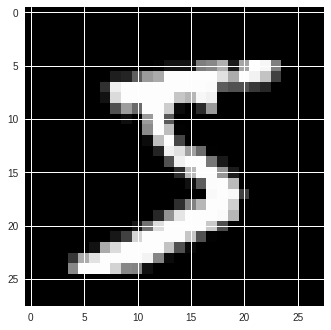

In [0]:
import matplotlib.pyplot as plt

# Also an option 
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

mnist_data = MNIST('./data', train=True, download=True, transform=transforms.ToTensor())
data_loader = DataLoader(mnist_data,
                         batch_size=4,
                         shuffle=False)

data_iter = iter(data_loader)
print (data_iter)

images, labels = data_iter.next()

npimg = images[0].numpy()
print (npimg.shape)
npimg = npimg.reshape((28, 28)) # Why do we do this ... ? 
print (npimg.shape)

plt.imshow(npimg, cmap='gray')
print('Label:', labels[0].item())


# Load the Dataset

**Note**: We shuffle the loading process of `train_dataset` to make the learning process independent of data order, but the order of `test_loader` remains so as to examine whether we can handle unspecified bias order of inputs.


In [0]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

dataset_sizes = {
    'train': len(train_loader.dataset), 
    'test': len(test_loader.dataset)
}


print (dataset_sizes)


{'train': 60000, 'test': 10000}


# Build two different Feedforward Neural Networks

### Feedforward Neural Network Model Structure

### NetA
The FNN includes two fully-connected layers (i.e. fc1 & fc2) and a non-linear ReLU layer in between. Normally we call this structure **1-hidden layer FNN**, without counting the output layer (fc2) in.

By running the forward pass, the input images (x) can go through the neural network and generate a output (out) demonstrating how are the likabilities it belongs to each of the 10 classes. _For example, a cat image can have 0.8 likability to a dog class and a 0.3 likability to a airplane class._

### NetB

In [0]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class NetA(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NetA, self).__init__()                    # Inherited from the parent class nn.Module
        self.fc1 = nn.Linear(input_size, hidden_size)  # 1st Full-Connected Layer: 784 (input data) -> 500 (hidden node)
        self.relu = nn.ReLU()                          # Non-Linear ReLU Layer: max(0,x)
        self.fc2 = nn.Linear(hidden_size, num_classes) # 2nd Full-Connected Layer: 500 (hidden node) -> 10 (output class)
    
    def forward(self, x):                              # Forward pass: stacking each layer together
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
      


class NetB(nn.Module):
    def __init__(self):
        super(NetB, self).__init__()
        self.l1 = nn.Linear(784, 128)
        self.l2 = nn.Linear(128, 32)
        self.l3 = nn.Linear(32, 10)
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.l1(x))
        x = torch.relu(self.l2(x))
        x = self.l3(x)
        x = F.log_softmax(x, dim=1)
        return x
    

# Instantiate the FNN

We now create a real FNN based on our structure.

In [0]:
neta = NetA(input_size, hidden_size, num_classes)
print (neta)

NetA(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [0]:
netb = NetB()
print (netb)

NetB(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=32, bias=True)
  (l3): Linear(in_features=32, out_features=10, bias=True)
)


# When using several GPU's

In [0]:
if use_cuda:
    model = neta.cuda()
model_name = (type(model).__name__) # remember the real name
print(model)

# for using more than one GPU
model = torch.nn.DataParallel(model, device_ids=list(range(1)))
print(model)

NetA(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
DataParallel(
  (module): NetA(
    (fc1): Linear(in_features=784, out_features=500, bias=True)
    (relu): ReLU()
    (fc2): Linear(in_features=500, out_features=10, bias=True)
  )
)


# Enable GPU

_**Note**: You could enable this line to run the codes on GPU_

In [0]:
use_cuda = True

In [0]:
if use_cuda and torch.cuda.is_available():
    neta.cuda()

# Choose the Loss Function and Optimizer

Loss function (**criterion**) decides how the output can be compared to a class, which determines how good or bad the neural network performs. And the **optimizer** chooses a way to update the weight in order to converge to find the best weights in this neural network.

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(neta.parameters(), lr=learning_rate)

print (criterion)
print (optimizer)


CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


# Training the FNN Model

This process might take around 3 to 5 minutes depending on your machine. The detailed explanations are listed as comments (#) in the following codes.

In [0]:
neta.train() # set training mode

NetA(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [69]:
from livelossplot import PlotLosses

liveloss = PlotLosses()

num_epochs=5

for epoch in range(num_epochs):
#     correct = 0
#     total = 0

    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = neta(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
                
#         _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
#         total += labels.size(0)                    # Increment the total count
#         correct += (predicted == labels).sum()     # Increment the correct count
            

        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
            
#             # Visualize the loss and accuracy values.
#             liveloss.update({
#                 'log loss': loss.data[0],
#                 #'val_log loss': test_loss,
#                 #'accuracy': (100 * correct / total),
#                 #'val_accuracy': test_correct,
#             })
#             liveloss.draw()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 0.0171
Epoch [1/5], Step [200/600], Loss: 0.0037
Epoch [1/5], Step [300/600], Loss: 0.0004
Epoch [1/5], Step [400/600], Loss: 0.0008
Epoch [1/5], Step [500/600], Loss: 0.0097
Epoch [1/5], Step [600/600], Loss: 0.0001
Epoch [2/5], Step [100/600], Loss: 0.0001
Epoch [2/5], Step [200/600], Loss: 0.0003
Epoch [2/5], Step [300/600], Loss: 0.0026
Epoch [2/5], Step [400/600], Loss: 0.0000
Epoch [2/5], Step [500/600], Loss: 0.0010
Epoch [2/5], Step [600/600], Loss: 0.0000
Epoch [3/5], Step [100/600], Loss: 0.0000
Epoch [3/5], Step [200/600], Loss: 0.0000
Epoch [3/5], Step [300/600], Loss: 0.0000
Epoch [3/5], Step [400/600], Loss: 0.0000
Epoch [3/5], Step [500/600], Loss: 0.0000
Epoch [3/5], Step [600/600], Loss: 0.0032
Epoch [4/5], Step [100/600], Loss: 0.0000
Epoch [4/5], Step [200/600], Loss: 0.0000
Epoch [4/5], Step [300/600], Loss: 0.0000
Epoch [4/5], Step [400/600], Loss: 0.0000
Epoch [4/5], Step [500/600], Loss: 0.0000
Epoch [4/5], Step [600/600], Loss:

# Testing the FNN Model

Similar to training the neural network, we also need to load batches of test images and collect the outputs. The differences are that:

1. No loss & weights calculation
2. No wights update
3. Has correct prediction calculation


In [55]:
neta.eval() # Inference mode

NetA(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [70]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    
    if use_cuda and torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    
    
    outputs = neta(images)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the 10K test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10K test images: 98 %


# Save the trained FNN Model for future use

We save the trained model as a pickle that can be loaded and used later.

In [0]:
torch.save(neta.state_dict(), 'fnn_model.pkl')

# Congrats

You have done building your first Feedforward Neural Network!

# 3 layer FFN

In [67]:
model = nn.Sequential()
model.add_module('fc1',      nn.Linear(784, 256))
model.add_module('relu1',    nn.ReLU())
model.add_module('dropout1', nn.Dropout())
model.add_module('fc2',      nn.Linear(256, 256))
model.add_module('relu2',    nn.ReLU())
model.add_module('dropout2', nn.Dropout())
model.add_module('fc3',      nn.Linear(256, 10))

print(model)
model.cuda()

Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)

In [71]:

num_epochs=5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
                
#         _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
#         total += labels.size(0)                    # Increment the total count
#         correct += (predicted == labels).sum()     # Increment the correct count
            

        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
                        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 2.3019
Epoch [1/5], Step [200/600], Loss: 2.2906
Epoch [1/5], Step [300/600], Loss: 2.3014
Epoch [1/5], Step [400/600], Loss: 2.3103
Epoch [1/5], Step [500/600], Loss: 2.2980
Epoch [1/5], Step [600/600], Loss: 2.3078
Epoch [2/5], Step [100/600], Loss: 2.3022
Epoch [2/5], Step [200/600], Loss: 2.3053
Epoch [2/5], Step [300/600], Loss: 2.3067
Epoch [2/5], Step [400/600], Loss: 2.3039
Epoch [2/5], Step [500/600], Loss: 2.2966
Epoch [2/5], Step [600/600], Loss: 2.3005
Epoch [3/5], Step [100/600], Loss: 2.2972
Epoch [3/5], Step [200/600], Loss: 2.2960
Epoch [3/5], Step [300/600], Loss: 2.3131
Epoch [3/5], Step [400/600], Loss: 2.2995
Epoch [3/5], Step [500/600], Loss: 2.3048
Epoch [3/5], Step [600/600], Loss: 2.3081
Epoch [4/5], Step [100/600], Loss: 2.3030
Epoch [4/5], Step [200/600], Loss: 2.3052
Epoch [4/5], Step [300/600], Loss: 2.2996
Epoch [4/5], Step [400/600], Loss: 2.3014
Epoch [4/5], Step [500/600], Loss: 2.2988
Epoch [4/5], Step [600/600], Loss:

# Why it does not work ?! can you trace the error? 










- criterion = nn.CrossEntropyLoss()
- optimizer = torch.optim.Adam(**neta**.parameters(), lr=learning_rate)

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


num_epochs=5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):   # Load a batch of images with its (index, data, class)
        images = Variable(images.view(-1, 28*28))         # Convert torch tensor to Variable: change image from a vector of size 784 to a matrix of 28 x 28
        labels = Variable(labels)
        
        if use_cuda and torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()                             # Intialize the hidden weight to all zeros
        outputs = model(images)                             # Forward pass: compute the output class given a image
        loss = criterion(outputs, labels)                 # Compute the loss: difference between the output class and the pre-given label
        loss.backward()                                   # Backward pass: compute the weight
        optimizer.step()                                  # Optimizer: update the weights of hidden nodes
        
                
#         _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
#         total += labels.size(0)                    # Increment the total count
#         correct += (predicted == labels).sum()     # Increment the correct count
            

        if (i+1) % 100 == 0:                              # Logging
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data[0]))
                        


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch [1/5], Step [100/600], Loss: 0.3614
Epoch [1/5], Step [200/600], Loss: 0.4324
Epoch [1/5], Step [300/600], Loss: 0.2259
Epoch [1/5], Step [400/600], Loss: 0.1309
Epoch [1/5], Step [500/600], Loss: 0.2889
Epoch [1/5], Step [600/600], Loss: 0.2968
Epoch [2/5], Step [100/600], Loss: 0.2008
Epoch [2/5], Step [200/600], Loss: 0.1542
Epoch [2/5], Step [300/600], Loss: 0.1963
Epoch [2/5], Step [400/600], Loss: 0.0969
Epoch [2/5], Step [500/600], Loss: 0.0908
Epoch [2/5], Step [600/600], Loss: 0.1436
Epoch [3/5], Step [100/600], Loss: 0.0924
Epoch [3/5], Step [200/600], Loss: 0.0682
Epoch [3/5], Step [300/600], Loss: 0.1377
Epoch [3/5], Step [400/600], Loss: 0.1065
Epoch [3/5], Step [500/600], Loss: 0.1059
Epoch [3/5], Step [600/600], Loss: 0.2072
Epoch [4/5], Step [100/600], Loss: 0.1572
Epoch [4/5], Step [200/600], Loss: 0.1179
Epoch [4/5], Step [300/600], Loss: 0.1904
Epoch [4/5], Step [400/600], Loss: 0.0973
Epoch [4/5], Step [500/600], Loss: 0.0969
Epoch [4/5], Step [600/600], Loss: